In [2]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_keys

# Import the datetime module from the datatime library
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?id={city id}&appid=" + weather_api_keys
print(url)

http://api.openweathermap.org/data/2.5/weather?id={city id}&appid=d2c9d2493e0412e81cec53bf032ff101


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | esperance
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | priladozhskiy
Processing Record 7 of Set 1 | sao bento do sul
Processing Record 8 of Set 1 | saint-augustin
Processing Record 9 of Set 1 | nuuk
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | campo verde
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | provideniya
Processing Record 15 of Set 1 | celestun
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | sao filipe
Processing Record 18 of Set 1 | palaikastron
Processing Record 19 of Set 1 | olafsvik
Processing Record 20 of Set 1 | belushya guba
City not found. Skipping...
Proces

Processing Record 36 of Set 4 | lagoa
Processing Record 37 of Set 4 | dzhusaly
City not found. Skipping...
Processing Record 38 of Set 4 | orhei
Processing Record 39 of Set 4 | tahe
Processing Record 40 of Set 4 | chuy
Processing Record 41 of Set 4 | abu dhabi
Processing Record 42 of Set 4 | road town
Processing Record 43 of Set 4 | coquimbo
Processing Record 44 of Set 4 | ponta do sol
Processing Record 45 of Set 4 | port moresby
Processing Record 46 of Set 4 | bonthe
Processing Record 47 of Set 4 | bambous virieux
Processing Record 48 of Set 4 | vestmannaeyjar
Processing Record 49 of Set 4 | umm kaddadah
Processing Record 50 of Set 4 | bredasdorp
Processing Record 1 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 5 | togur
Processing Record 3 of Set 5 | glendive
Processing Record 4 of Set 5 | jumla
Processing Record 5 of Set 5 | ancud
Processing Record 6 of Set 5 | leningradskiy
Processing Record 7 of Set 5 | clyde river
Processing Record 8 of Set 5 | tar

Processing Record 30 of Set 8 | gravdal
Processing Record 31 of Set 8 | bargal
City not found. Skipping...
Processing Record 32 of Set 8 | baruun-urt
Processing Record 33 of Set 8 | lebyazhye
Processing Record 34 of Set 8 | pacific grove
Processing Record 35 of Set 8 | puro
Processing Record 36 of Set 8 | garowe
Processing Record 37 of Set 8 | padang
Processing Record 38 of Set 8 | marawi
Processing Record 39 of Set 8 | kloulklubed
Processing Record 40 of Set 8 | alice springs
Processing Record 41 of Set 8 | hay river
Processing Record 42 of Set 8 | zabid
Processing Record 43 of Set 8 | miraflores
Processing Record 44 of Set 8 | gamba
Processing Record 45 of Set 8 | ovsyanka
Processing Record 46 of Set 8 | sohagpur
Processing Record 47 of Set 8 | kalmar
Processing Record 48 of Set 8 | tres arroyos
Processing Record 49 of Set 8 | shushenskoye
Processing Record 50 of Set 8 | lata
Processing Record 1 of Set 9 | verkhnyaya inta
Processing Record 2 of Set 9 | jijiga
Processing Record 3 of S

Processing Record 18 of Set 12 | nhulunbuy
Processing Record 19 of Set 12 | te anau
Processing Record 20 of Set 12 | simao
Processing Record 21 of Set 12 | guiyang
Processing Record 22 of Set 12 | namwala
Processing Record 23 of Set 12 | sorland
Processing Record 24 of Set 12 | auki
Processing Record 25 of Set 12 | margate
Processing Record 26 of Set 12 | lorengau
Processing Record 27 of Set 12 | erenhot
Processing Record 28 of Set 12 | fortin
City not found. Skipping...
Processing Record 29 of Set 12 | cartagena del chaira
Processing Record 30 of Set 12 | lotofaga
Processing Record 31 of Set 12 | huitziltepec
Processing Record 32 of Set 12 | lavrentiya
Processing Record 33 of Set 12 | moron
Processing Record 34 of Set 12 | laguna
Processing Record 35 of Set 12 | terney
Processing Record 36 of Set 12 | andenes
Processing Record 37 of Set 12 | vinh
Processing Record 38 of Set 12 | akranes
Processing Record 39 of Set 12 | marstal
Processing Record 40 of Set 12 | cuaspud
Processing Record

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Esperance,-33.8667,121.9000,279.06,87,5,5.34,AU,2021-09-20 19:34:38
1,Puerto Ayora,-0.7393,-90.3518,300.13,80,95,4.78,EC,2021-09-20 19:34:39
2,Kodiak,57.7900,-152.4072,284.88,71,90,6.17,US,2021-09-20 19:34:39
3,Priladozhskiy,59.8500,31.4833,279.96,70,96,4.97,RU,2021-09-20 19:34:39
4,Sao Bento Do Sul,-26.2503,-49.3786,294.62,66,1,0.52,BR,2021-09-20 19:34:40
5,Saint-Augustin,51.2260,-58.6502,287.33,34,2,3.55,CA,2021-09-20 19:34:40
6,Nuuk,64.1835,-51.7216,274.49,86,75,5.14,GL,2021-09-20 19:34:40
7,Arraial Do Cabo,-22.9661,-42.0278,298.13,78,0,11.32,BR,2021-09-20 19:34:41
8,Hermanus,-34.4187,19.2345,285.47,62,5,1.74,ZA,2021-09-20 19:34:41
9,Campo Verde,-20.4167,-54.0667,312.71,9,34,3.67,BR,2021-09-20 19:34:41


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

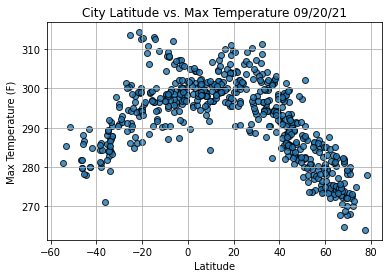

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

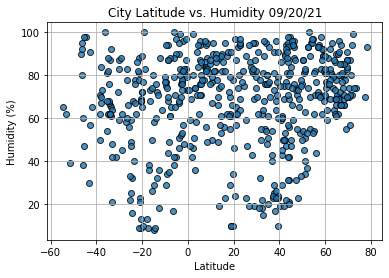

In [12]:
  # Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

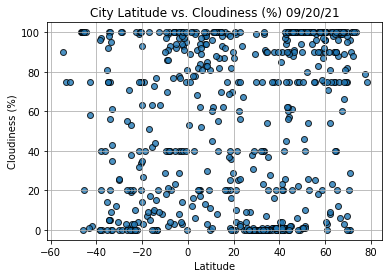

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

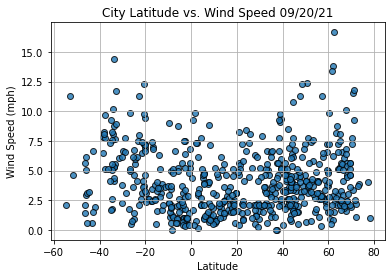

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()